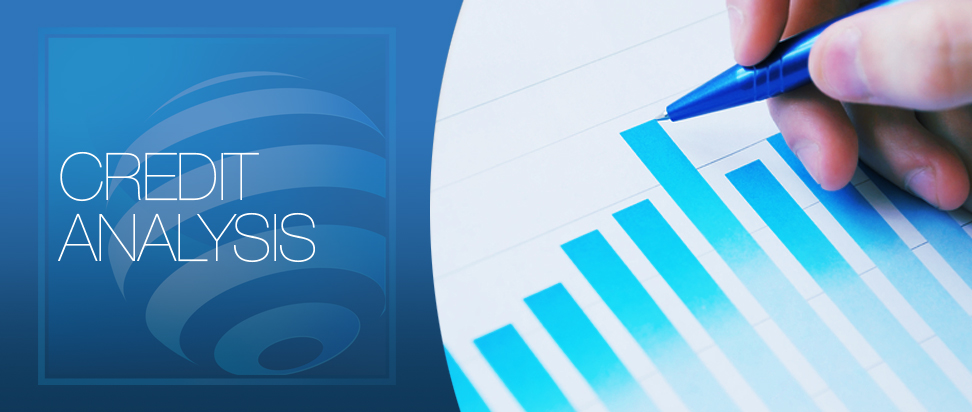

# <font color = Indigo > Credit EDA Case Study

<div style="text-align: right"> <font color = Indigo >-- By Anusha Danday & Krishna Silpa Nandagiri </div>

### <b>Table of Contents</b>

<ol>
        <li><a href='#intro'>Introduction</a></li>
        <ol>
            <li><a href='#prob'>Problem Statement</a></li>
            <li><a href='#bu'>Business Understanding</a></li>
        </ol>
        <li><a href='#env'>Preparing the Environment</a></li>
        <ol>
            <li><a href='#warning'>Filtering the warnings</a></li>
            <li><a href='#libraries'>Importing all the necessary libraries</a></li>
            <li><a href='#display'>Preparing Jupyter Display  Options</a></li>
        </ol>
        <li><a href='#import'>Ingesting the source data</a></li>
        <ol>
            <li><a href='#input'>Read the CSV files</a></li>
            <li><a href='#inspect'>Inspect the Data Frames</a></li>
        </ol>
        <li><a href='#clean'>Data Cleansing & Handling the missing values</a></li>
        <ol>
            <li><a href='#null'>Identifying missing values</a></li>
            <li><a href='#handle'>Handling Missing Values - a) Dropping & b) Imputing</a></li>
            <li><a href='#outlier'>Identifying the outliers</a></li>
        </ol>
        <li><a href='#analysis'>Data Analysis</a></li>
        <ol>
            <li><a href='#imbalance'>Understand the Data Imbalance</a></li>
            <li><a href='#catvar'>Categorical Variable Analysis without and with Target Variable</a></li>
            <li><a href='#numunivar'>Numerical Univariate Analysis</a></li>
            <li><a href='#numbivar'>Numerical Bivariate Analysis</a></li>
            <li><a href='#nummultivar'>Numerical Multivariate Analysis (Correlation Matrix)</a></li>
        </ol>
        <li><a href='#merge'>Consolidated Data Set Analysis</a></li>
        <ol>
            <li><a href='#prep'> Merge Data Sets</a></li>
            <li><a href='#mcatvar'>Categorial Univariate Analysis</a></li>
            <li><a href='#mnumbivar'>Numerical Bivariate Analysis</a></li>
            <li><a href='#mnummultivar'>Numerical Multivariate Analysis</a></li>
        </ol>
        <li><a href='#conclusion'>Inferences & Conclusion</a></li>
    </ol>

<a id="intro"></a>
## 1. Introduction

<a id="prob"></a>
### <font color = "sky blue" > 1.1 Problem Statement

<p>
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
</P>
 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
<ul>
<li>
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
<li>
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
</ul>
<p>    
The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
<ul>
<li>
The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
<li>
All other cases: All other cases when the payment is paid on time.
</ul>
</p>

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
<ul>
<li>
Approved: The Company has approved loan Application
<li>
Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
<li>
Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
<li>
Unused offer:  Loan has been cancelled by the client but on different stages of the process.


<a id="bu"></a>
### <font color = "sky blue" > 1.2 Business Understanding

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

With the help of this EDA, we try to understand the patterns present in the data pertaining to the loan repaying capabilities of the applicants & how consumer attributes and loan attributes influence the tendency of default.

<a id="env"></a>
## 2. Preparing the Environment

<a id="warning"></a>
### <font color = "sky blue" > 2.1 Filtering out warnings

In [280]:
import warnings
warnings.filterwarnings('ignore')

<a id="libraries"></a>
### <font color = "sky blue" > 2.2 Importing all the necessary libraries

In [281]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<a id="display"></a>
### <font color = "sky blue" > 2.3 Prepare Juptyer Display Options

In [282]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

<a id="import"></a>
## 3. Ingesting the source data

<a id="input"></a>
### <font color = "sky blue" > 3.1 Read the CSV files

<div class="alert alert-block alert-info">
    <font color = "purple" >"application_data.csv" --- The data is about whether a client has payment difficulties. <br>
                "previous_application.csv" --- The data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

In [519]:
applicationDF=pd.read_csv('application_data.csv')
previousDF=pd.read_csv('previous_application.csv')

In [520]:
applicationDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [521]:
previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


<a id="inspect"></a>
### <font color = "sky blue" > 3.2 Inspecting the Data Frames

<font color = "purple" > Let us check the rows and columns of the dataframes

In [286]:
print("Application Data Frame: ")
print("Rows -", applicationDF.shape[0], ": Columns -", applicationDF.shape[1])
print(" ")
print("Previous Application Data Frame: ")
print("Rows -", previousDF.shape[0], ": Columns -", previousDF.shape[1])

Application Data Frame: 
Rows - 307511 : Columns - 122
 
Previous Application Data Frame: 
Rows - 1670214 : Columns - 37


<div class="alert alert-block alert-info">
    <font color = "purple" > A little more sneak peak!

In [287]:
applicationDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [288]:
previousDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [522]:
applicationDF.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [524]:
previousDF.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

<div class="alert alert-block alert-info">
    <font color = "purple" >How about a quick look at the columns stats ?
    (for both numerical and categorical columns)
        </div>

In [289]:
applicationDF.describe(include='all').round(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511,307511,307511,307511,307511.00,3.075110e+05,307511.00,307499.00,307233.00,306219,307511,307511,307511,307511,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,211120,307509.00,307511.00,307511.00,307511,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,97216,153214,159080.00,151170,161756,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.0,307511.00,307511.0,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,NaN,7,8,5,6,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,3,NaN,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [12]:
previousDF.describe(include='all').round(2)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1670214,1297979.00,1670214.00,1670213.00,774370.0,1284699.00,1670214,1670214.00,1670214,1670214.00,774370.00,5951.00,5951.00,1670214,1670214,1670214.00,1670214,1670214,849809,1670214,1670214,1670214,1670214,1670214,1670214.00,1670214,1297984.00,1670214,1669868,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,7,NaN,2,NaN,NaN,NaN,NaN,25,4,NaN,4,9,7,4,28,5,3,8,NaN,11,NaN,5,17,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,NaN,NaN,NaN,NaN,NaN,TUESDAY,NaN,Y,NaN,NaN,NaN,NaN,XAP,Approved,NaN,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,NaN,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,747553,NaN,NaN,NaN,NaN,NaN,255118,NaN,1661739,NaN,NaN,NaN,NaN,922661,1036781,NaN,1033552,1353093,508970,1231261,950809,691011,1063666,719968,NaN,855720,NaN,517215,285990,NaN,NaN,NaN,NaN,NaN,NaN
mean,1923089.14,278357.17,NaN,15955.12,175233.86,196114.02,6697.4,227847.28,NaN,12.48,NaN,1.00,0.08,0.19,0.77,NaN,NaN,-880.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,313.95,NaN,16.05,NaN,NaN,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,NaN,14782.14,292779.76,318574.62,20921.5,315396.56,NaN,3.33,NaN,0.06,0.11,0.09,0.10,NaN,NaN,779.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7127.44,NaN,14.57,NaN,NaN,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,NaN,0.00,0.00,0.00,-0.9,0.00,NaN,0.00,NaN,0.00,-0.00,0.03,0.37,NaN,NaN,-2922.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,0.00,NaN,NaN,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,NaN,6321.78,18720.00,24160.50,0.0,50841.00,NaN,10.00,NaN,1.00,0.00,0.16,0.72,NaN,NaN,-1300.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.00,NaN,6.00,NaN,NaN,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,NaN,11250.00,71046.00,80541.00,1638.0,112320.00,NaN,12.00,NaN,1.00,0.05,0.19,0.84,NaN,NaN,-581.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.00,NaN,12.00,NaN,NaN,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,NaN,20658.42,180360.00,216418.50,7740.0,234000.00,NaN,15.00,NaN,1.00,0.11,0.19,0.85,NaN,NaN,-280.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.00,NaN,24.00,NaN,NaN,365243.00,-411.00,129.00,-74.00,-44.00,1.00


<a id="clean"></a>
## 4. Data Cleansing and Handling Missing Values

<a id="null"></a>
### <font color = "sky blue" > 4.1 Identifying the missing values

<div class="alert alert-block alert-info"><font color=purple> <b>Application Data Frame - Null Value Analysis

In [290]:
print("Percentage Nulls for all the columns"+'\n')
print(round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2).sort_values(ascending=False))

Percentage Nulls for all the columns

COMMONAREA_MEDI                 69.87
COMMONAREA_AVG                  69.87
COMMONAREA_MODE                 69.87
NONLIVINGAPARTMENTS_MODE        69.43
NONLIVINGAPARTMENTS_MEDI        69.43
NONLIVINGAPARTMENTS_AVG         69.43
FONDKAPREMONT_MODE              68.39
LIVINGAPARTMENTS_MEDI           68.35
LIVINGAPARTMENTS_MODE           68.35
LIVINGAPARTMENTS_AVG            68.35
FLOORSMIN_MEDI                  67.85
FLOORSMIN_MODE                  67.85
FLOORSMIN_AVG                   67.85
YEARS_BUILD_MEDI                66.50
YEARS_BUILD_AVG                 66.50
YEARS_BUILD_MODE                66.50
OWN_CAR_AGE                     65.99
LANDAREA_MODE                   59.38
LANDAREA_AVG                    59.38
LANDAREA_MEDI                   59.38
BASEMENTAREA_MEDI               58.52
BASEMENTAREA_AVG                58.52
BASEMENTAREA_MODE               58.52
EXT_SOURCE_1                    56.38
NONLIVINGAREA_MEDI              55.18
NONLIVINGARE

In [291]:
print("Columns having more than 40% Null Values "+'\n')
appl_null_DF=pd.DataFrame(round(applicationDF.isnull().sum() / applicationDF.shape[0] * 100.00,2)).reset_index()
appl_null_DF.columns=['Column_Name','Null_Percentage']
print(appl_null_DF[appl_null_DF['Null_Percentage']>40].sort_values(by='Null_Percentage',ascending=False))

Columns having more than 40% Null Values 

                     Column_Name  Null_Percentage
48                COMMONAREA_AVG            69.87
76               COMMONAREA_MEDI            69.87
62               COMMONAREA_MODE            69.87
84      NONLIVINGAPARTMENTS_MEDI            69.43
70      NONLIVINGAPARTMENTS_MODE            69.43
56       NONLIVINGAPARTMENTS_AVG            69.43
86            FONDKAPREMONT_MODE            68.39
82         LIVINGAPARTMENTS_MEDI            68.35
54          LIVINGAPARTMENTS_AVG            68.35
68         LIVINGAPARTMENTS_MODE            68.35
66                FLOORSMIN_MODE            67.85
80                FLOORSMIN_MEDI            67.85
52                 FLOORSMIN_AVG            67.85
61              YEARS_BUILD_MODE            66.50
47               YEARS_BUILD_AVG            66.50
75              YEARS_BUILD_MEDI            66.50
21                   OWN_CAR_AGE            65.99
67                 LANDAREA_MODE            59.38
81     

In [292]:
print("Number of Columns in Application Data Frame with more than 40% null values::::: ", 
      len(appl_null_DF[appl_null_DF['Null_Percentage']>40]))

Number of Columns in Application Data Frame with more than 40% null values:::::  49


In [293]:
#Create dataframes for Categorical and Numerical Columns
df_cat_appl=applicationDF[['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
                           'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                           'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 
                           'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 
                           'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 
                           'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 
                           'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
                           'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 
                           'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 
                           'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 
                           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
                           'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                           'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]

df_num_appl=applicationDF[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
                           'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 
                           'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
                           'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
                           'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 
                           'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 
                           'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
                           'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
                           'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 
                           'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
                           'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
                           'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
                           'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 
                           'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 
                           'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']]


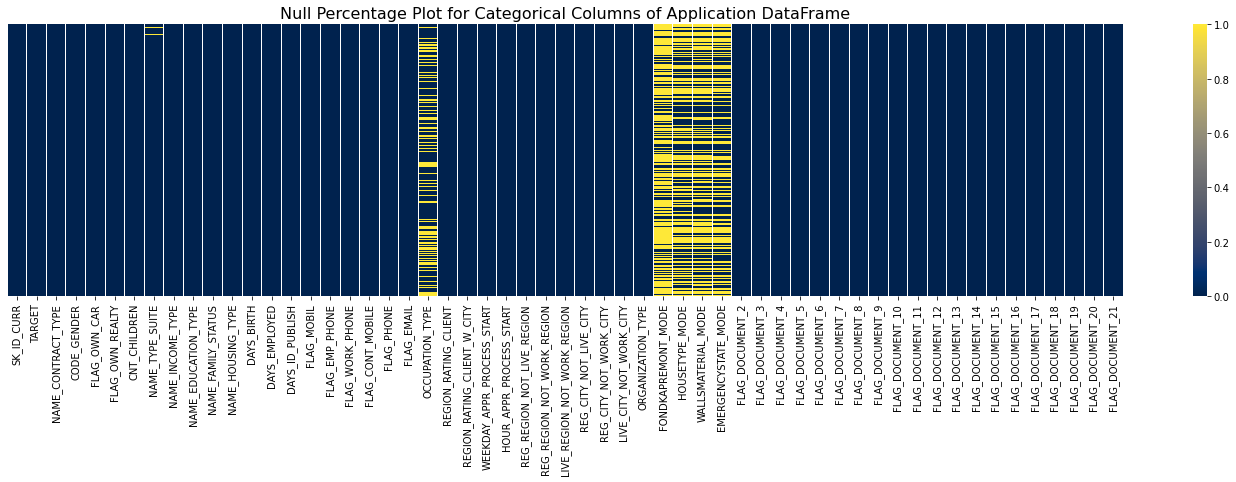

In [294]:
plt.figure(figsize=[25,5])
sns.heatmap(df_cat_appl.isnull(),yticklabels=False,cmap='cividis')
plt.title("Null Percentage Plot for Categorical Columns of Application DataFrame", fontdict={'fontsize':16})
plt.show()

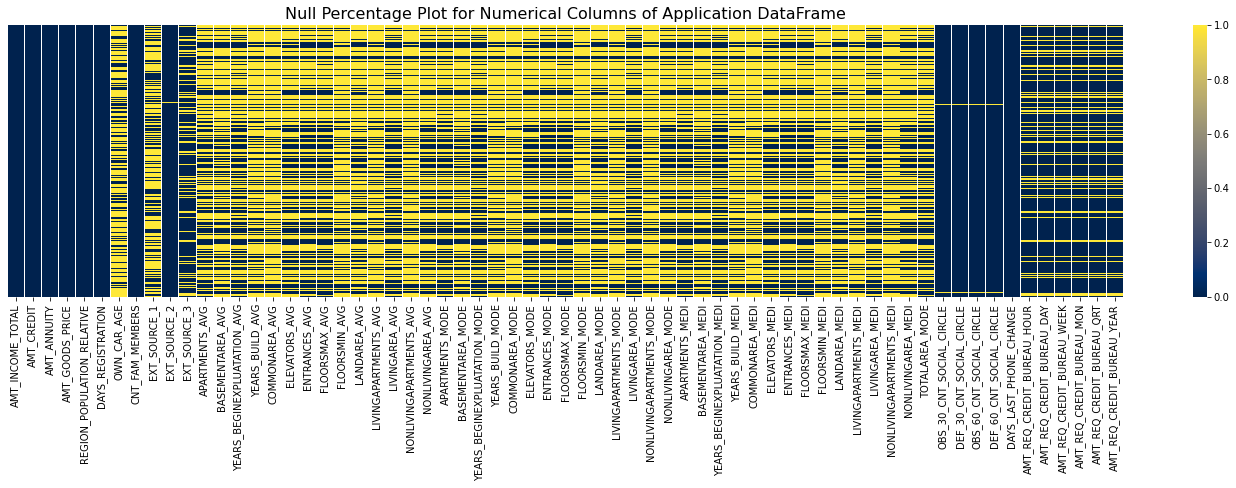

In [295]:
plt.figure(figsize=[25,5])
sns.heatmap(df_num_appl.isnull(),yticklabels=False,cmap='cividis')
plt.title("Null Percentage Plot for Numerical Columns of Application DataFrame", fontdict={'fontsize':16})
plt.show()

<div class="alert alert-block alert-success">
    Application Data Frame has <b>49 columns </b> that have more than 40% null values.
    <br>We have also seen how is the null percentage in the numerical and categorical columns.
    <br>(We separated the categorical columns and Numerical columns, for better readability of the heatmaps)

<div class="alert alert-block alert-info"><font color=purple><b> Previous Application Data Frame - Null Value Analysis

In [296]:
print("Percentage Nulls for all the columns"+'\n')
print(round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2).sort_values(ascending=False))

Percentage Nulls for all the columns

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00


In [297]:
print("Columns having more than 40% Null Values "+'\n')
prev_null_DF=pd.DataFrame(round(previousDF.isnull().sum() / previousDF.shape[0] * 100.00,2)).reset_index()
prev_null_DF.columns=['Column_Name','Null_Percentage']
print(prev_null_DF[prev_null_DF['Null_Percentage']>40].sort_values(by='Null_Percentage',ascending=False))

Columns having more than 40% Null Values 

                  Column_Name  Null_Percentage
13      RATE_INTEREST_PRIMARY            99.64
14   RATE_INTEREST_PRIVILEGED            99.64
6            AMT_DOWN_PAYMENT            53.64
12          RATE_DOWN_PAYMENT            53.64
20            NAME_TYPE_SUITE            49.12
31         DAYS_FIRST_DRAWING            40.30
32             DAYS_FIRST_DUE            40.30
33  DAYS_LAST_DUE_1ST_VERSION            40.30
34              DAYS_LAST_DUE            40.30
35           DAYS_TERMINATION            40.30
36  NFLAG_INSURED_ON_APPROVAL            40.30


In [298]:
print("Number of Columns in Previous Application Data Frame with more than 40% null values::::: ", 
      len(prev_null_DF[prev_null_DF['Null_Percentage']>40]))

Number of Columns in Previous Application Data Frame with more than 40% null values:::::  11


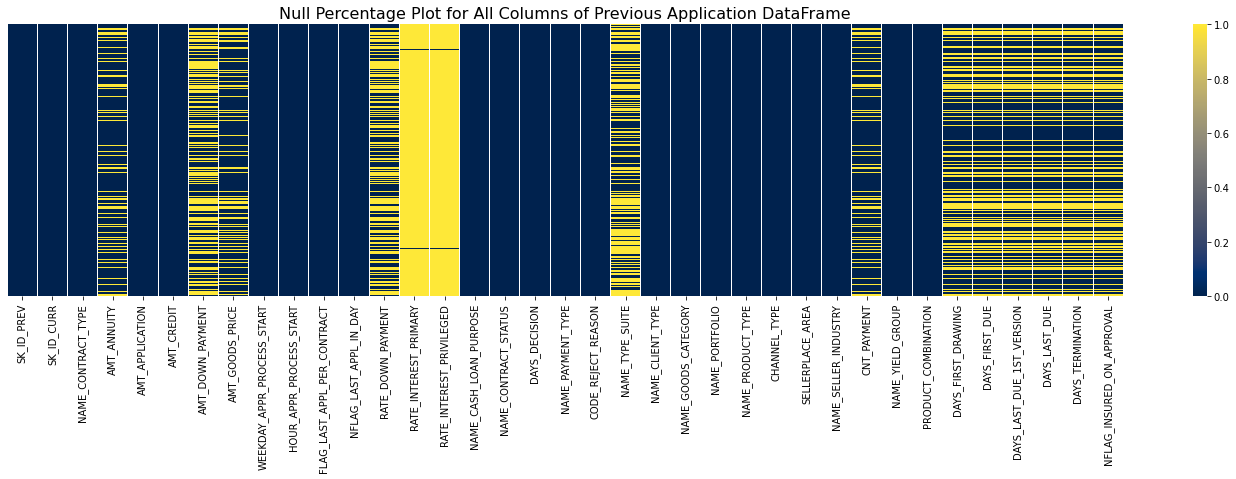

In [299]:
plt.figure(figsize=[25,5])
sns.heatmap(previousDF.isnull(),yticklabels=False,cmap='cividis')
plt.title("Null Percentage Plot for All Columns of Previous Application DataFrame", fontdict={'fontsize':16})
plt.show()

<div class="alert alert-block alert-success">
    Previous Data Frame has <b>11 columns </b> that have more than 40% null values.
    <br>We have also seen how is the null percentage in the numerical and categorical columns.

<a id="handle"></a>
### <font color = "sky blue" > 4.2 Handling the missing values
   

<div class="alert alert-block alert-info"><font color=purple> <b>a) Dropping the missing values <br></b>
<br> Application Data frame - 49 columns to be dropped
<br> Previous Application Data Frame - 11 Columns to be dropped    

In [300]:
#Retrieving the columns names to be deleted as a list
appl_col_del=list(appl_null_DF[appl_null_DF['Null_Percentage']>40].Column_Name)

#Dropping the columns
applicationDF.drop(labels=appl_col_del,axis=1,inplace=True)

#Confirming the number of columns
applicationDF.shape

(307511, 73)

In [301]:
#Retrieving the columns names to be deleted as a list
prev_col_del=list(prev_null_DF[prev_null_DF['Null_Percentage']>40].Column_Name)

#Dropping the columns
previousDF.drop(labels=prev_col_del,axis=1,inplace=True)

#Confirming the number of columns
previousDF.shape

(1670214, 26)

<div class="alert alert-block alert-info"><font color=purple><b> b) Approach for Imputation of the Missing Values </b>
    <br>
    (Here, as it is EDA, we are not imputing any missing values but just calling out an approach that can be followed)
    <br>
    <ul>
        <li>
        <b>Categorical variables:</b> <br>
            Lower null percentage: mode() is used to impute the most frequent items.<br>
            Higher null percentage: A new category can be created encapsulating those columns.<br>
        <li>
        <b>Numerical variables :</b><br>
            Median is used if the distribution is skewed <br>
            Mode is used if the distribution pattern is preserved.

<a id="outlier"></a>
### <font color = "sky blue" > 4.3 Identifying the outliers

<div class="alert alert-block alert-info"><font color=purple>In, Application DataFrame, We have chosen the below columns to identify if there are any outliers: <br>
CNT_CHILDREN                     int64<br>
AMT_INCOME_TOTAL               float64<br>
AMT_CREDIT                     float64<br>
AMT_ANNUITY                    float64<br>
AMT_GOODS_PRICE                float64<br>

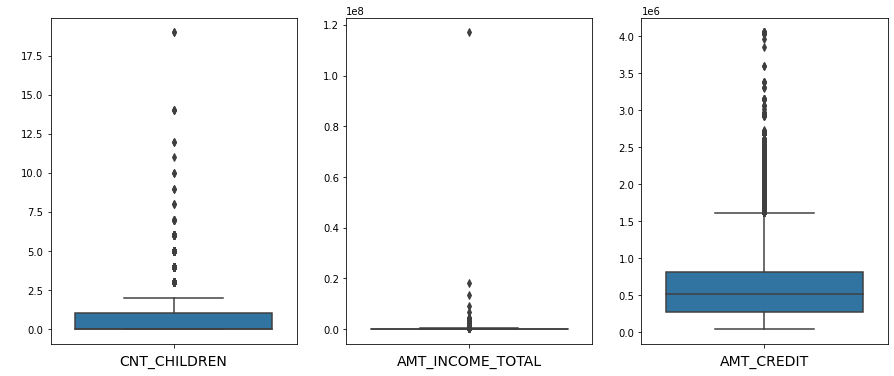

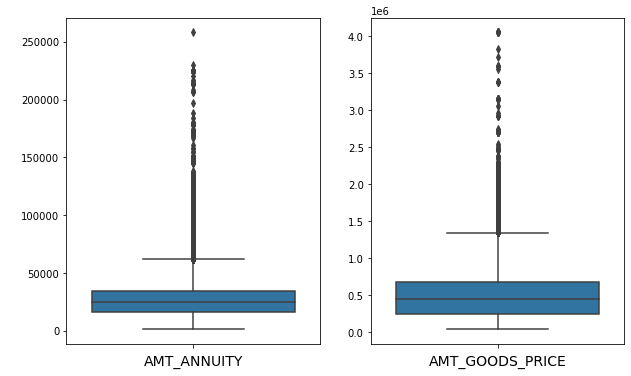

In [302]:
fig, ax= plt.subplots(ncols=3,sharey=False, figsize=[15,6])
b1=sns.boxplot(data=applicationDF,x='CNT_CHILDREN', orient='v', ax=ax[0])
b1.set_xlabel('CNT_CHILDREN', fontsize=14)
b1.set_ylabel(' ')

b2=sns.boxplot(data=applicationDF,x='AMT_INCOME_TOTAL', orient='v', ax=ax[1])
b2.set_xlabel('AMT_INCOME_TOTAL', fontsize=14)
b2.set_ylabel(' ')

b3=sns.boxplot(data=applicationDF,x='AMT_CREDIT', orient='v', ax=ax[2])
b3.set_xlabel('AMT_CREDIT', fontsize=14)
b3.set_ylabel(' ')

fig, bx= plt.subplots(ncols=2,sharey=False, figsize=[10,6])

b4=sns.boxplot(data=applicationDF,x='AMT_ANNUITY', orient='v', ax=bx[0])
b4.set_xlabel('AMT_ANNUITY', fontsize=14)
b4.set_ylabel(' ')

b5=sns.boxplot(data=applicationDF,x='AMT_GOODS_PRICE', orient='v', ax=bx[1])
b5.set_xlabel('AMT_GOODS_PRICE', fontsize=14)
b5.set_ylabel(' ')
plt.show()

In [303]:
applicationDF[['AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_CHILDREN']].describe()

,AMT_ANNUITY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,CNT_CHILDREN
count,307499.000000,3.075110e+05,3.075110e+05,3.072330e+05,307511.000000
mean,27108.573909,1.687979e+05,5.990260e+05,5.383962e+05,0.417052
std,14493.737315,2.371231e+05,4.024908e+05,3.694465e+05,0.722121
min,1615.500000,2.565000e+04,4.500000e+04,4.050000e+04,0.000000
25%,16524.000000,1.125000e+05,2.700000e+05,2.385000e+05,0.000000
50%,24903.000000,1.471500e+05,5.135310e+05,4.500000e+05,0.000000
75%,34596.000000,2.025000e+05,8.086500e+05,6.795000e+05,1.000000
max,258025.500000,1.170000e+08,4.050000e+06,4.050000e+06,19.000000


<div class="alert alert-block alert-success">
    <ul>
    <li>AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.</li>
    <li>AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.</li>

<div class="alert alert-block alert-info"><font color=purple>In Previous Application DataFrame, We have chosen the below columns to identify if there are any outliers: <br>
CNT_PAYMENT                     int64<br>
AMT_APPLICATION               float64<br>
AMT_CREDIT                     float64<br>
AMT_ANNUITY                    float64<br>
AMT_GOODS_PRICE                float64<br>

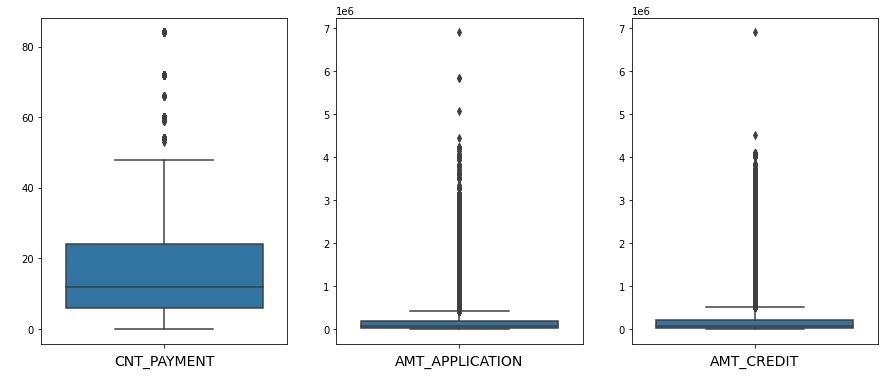

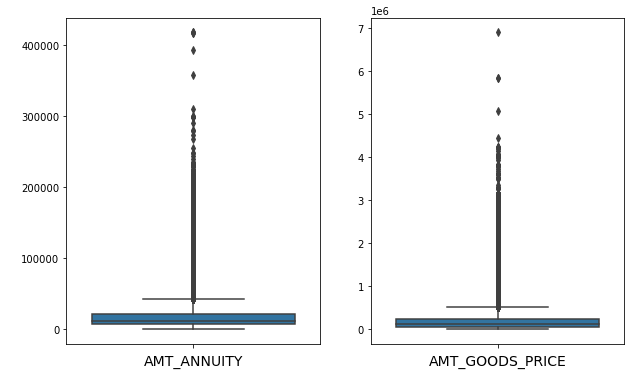

In [304]:
fig, ax= plt.subplots(ncols=3,sharey=False, figsize=[15,6])
b1=sns.boxplot(data=previousDF,x='CNT_PAYMENT', orient='v', ax=ax[0])
b1.set_xlabel('CNT_PAYMENT', fontsize=14)
b1.set_ylabel(' ')

b2=sns.boxplot(data=previousDF,x='AMT_APPLICATION', orient='v', ax=ax[1])
b2.set_xlabel('AMT_APPLICATION', fontsize=14)
b2.set_ylabel(' ')

b3=sns.boxplot(data=previousDF,x='AMT_CREDIT', orient='v', ax=ax[2])
b3.set_xlabel('AMT_CREDIT', fontsize=14)
b3.set_ylabel(' ')

fig, bx= plt.subplots(ncols=2,sharey=False, figsize=[10,6])

b4=sns.boxplot(data=previousDF,x='AMT_ANNUITY', orient='v', ax=bx[0])
b4.set_xlabel('AMT_ANNUITY', fontsize=14)
b4.set_ylabel(' ')

b5=sns.boxplot(data=previousDF,x='AMT_GOODS_PRICE', orient='v', ax=bx[1])
b5.set_xlabel('AMT_GOODS_PRICE', fontsize=14)
b5.set_ylabel(' ')
plt.show()

<div class="alert alert-block alert-success">
    <ul>
    <li>AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE have huge number of outliers.
    <li>CNT_PAYMENT has few outlier values.

<a id="analysis"></a>
## 5. Data Analysis

<div class="alert alert-block alert-info"><font color=purple> 
    <b> Application DataFrame</b><br>
   The Target column contains 0 & 1 values <br>
   0 -- The loan has been repayed <br>
   1 -- The loan has been defaulted <br>
   Clients with Payment Difficulties are the Target for us i.e. Target = 1 cases (Defaulters)<br>
  <b> We need to understand the data distribution and the identify the patterns that cause a default.  

<a id="imbalance"></a>
### <font color = "sky blue" > 5.1 Understanding the Data Imbalance

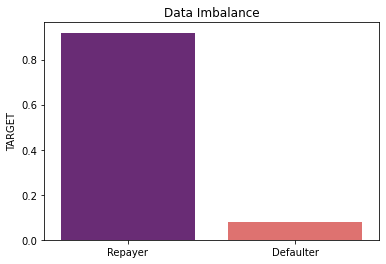

In [314]:
unbalance=pd.DataFrame(applicationDF['TARGET'].value_counts(normalize=True))
unbalance.index=['Repayer','Defaulter']
sns.barplot(data=unbalance, x=unbalance.index, y='TARGET', palette='magma')
plt.title("Data Imbalance")
plt.show()

In [319]:
unbalance.columns=['Percentages']
unbalance.reset_index()
print(round(unbalance*100,2))

R = unbalance.iloc[0]["Percentages"]
D = unbalance.iloc[1]["Percentages"]

print("The Ratio of Imbalance of Repayers to Defaults is - ",(round(R/D,2)),': 1')

           Percentages
Repayer          91.93
Defaulter         8.07
The Ratio of Imbalance of Repayers to Defaults is -  11.39 : 1


<div class="alert alert-block alert-success">
    <ul>
    <li>The Imbalance (Repayer to Defaulter) ratio - 11.39:1

<a id="catvar"></a>
### <font color = "sky blue" > 5.2 Categorical Variable Analysis without and with Target Variable

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 1. Whether Cash Loans or Revolving Loans were Defaulted?  

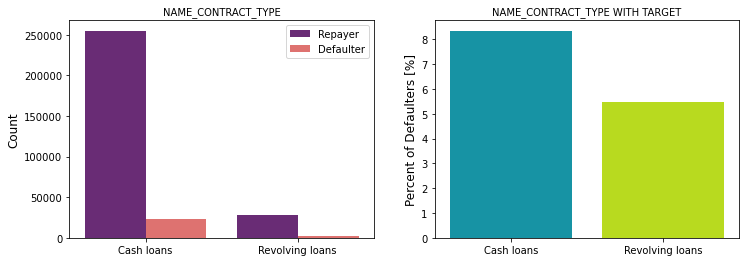

In [470]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["NAME_CONTRACT_TYPE", 'TARGET']].groupby(["NAME_CONTRACT_TYPE"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="NAME_CONTRACT_TYPE", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["NAME_CONTRACT_TYPE"],
                    palette='magma')

ax1.set_title('NAME_CONTRACT_TYPE', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('')

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "NAME_CONTRACT_TYPE", 
                    y='TARGET', 
                    order=cat_perc["NAME_CONTRACT_TYPE"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('NAME_CONTRACT_TYPE WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>Revolving Loans are less in number (around 10% of the Cash Loans) in the entire data set.
    <li>But at the same time, the percentage defaulters are 5.5%<br>
   Looking at this, we can say that there is more chance for a Revolving Loan to get defaulted.     
  

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 2. Whether Males or Females have higher chances of defaulting?  

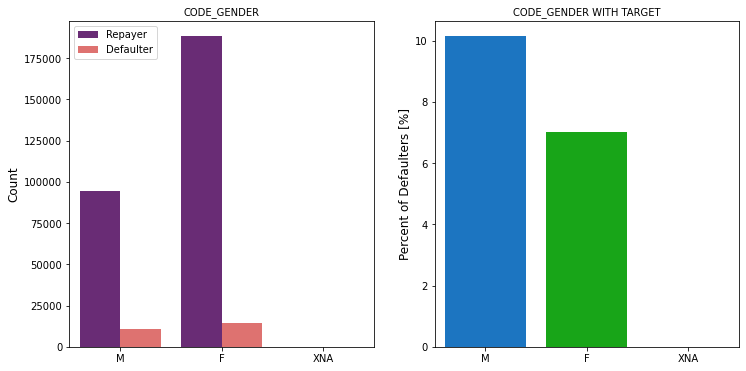

In [469]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["CODE_GENDER", 'TARGET']].groupby(["CODE_GENDER"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="CODE_GENDER", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["CODE_GENDER"],
                    palette='magma')

ax1.set_title('CODE_GENDER', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('')

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "CODE_GENDER", 
                    y='TARGET', 
                    order=cat_perc["CODE_GENDER"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('CODE_GENDER WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>Overall, the number of females who take the loans are more compared to males
    <li>We can clearly see that there are more Male defaulters 
    <br>So, we can say Males are more likely to default the loans.

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 3. Does the type of houses impact the chances of defaulting?  

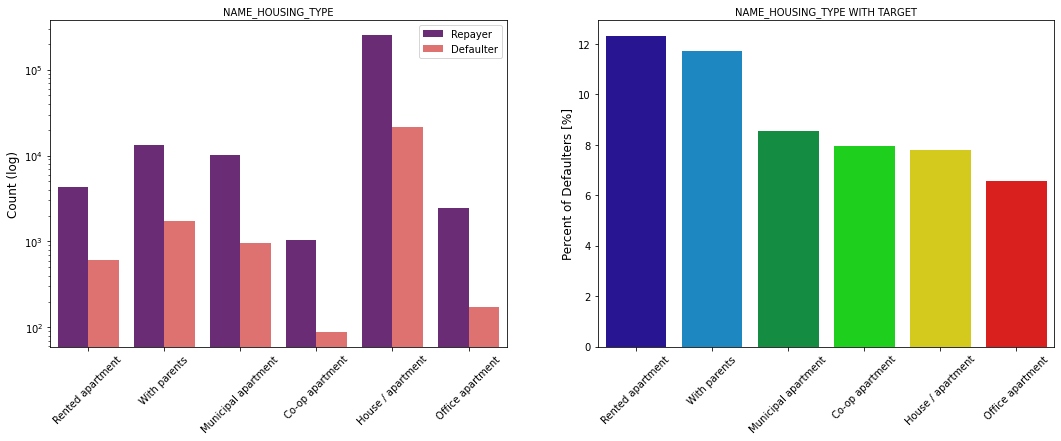

In [370]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["NAME_HOUSING_TYPE", 'TARGET']].groupby(["NAME_HOUSING_TYPE"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="NAME_HOUSING_TYPE", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["NAME_HOUSING_TYPE"],
                    palette='magma')

ax1.set_title('NAME_HOUSING_TYPE', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "NAME_HOUSING_TYPE", 
                    y='TARGET', 
                    order=cat_perc["NAME_HOUSING_TYPE"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('NAME_HOUSING_TYPE WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>More number of people stay in Apartments
    <li>We can clearly see that People living with parents and staying in rented apartments comprise the highest number of default percentage.
    <li> Office Apartment residents are having lowest default percentage     

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 4. Does the family status of the applicant affect loan repayment?  

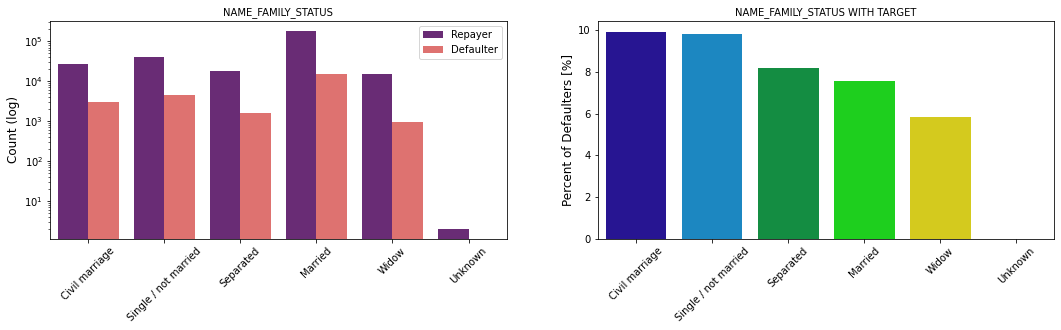

In [389]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["NAME_FAMILY_STATUS", 'TARGET']].groupby(["NAME_FAMILY_STATUS"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,4))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="NAME_FAMILY_STATUS", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["NAME_FAMILY_STATUS"],
                    palette='magma')

ax1.set_title('NAME_FAMILY_STATUS', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "NAME_FAMILY_STATUS", 
                    y='TARGET', 
                    order=cat_perc["NAME_FAMILY_STATUS"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('NAME_FAMILY_STATUS WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>Married people have taken maximum number of loans
    <li>Mostly people with Civil marriages & Single/Unmarried people tend to default a lot

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 5. Does the number of children of the applicant affect loan repayment?  

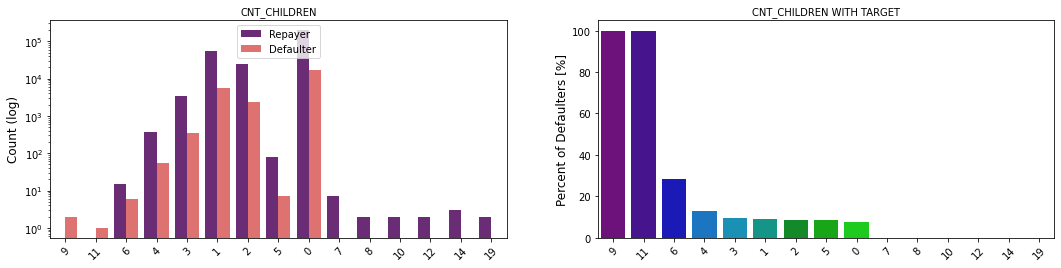

In [390]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["CNT_CHILDREN", 'TARGET']].groupby(["CNT_CHILDREN"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,4))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="CNT_CHILDREN", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["CNT_CHILDREN"],
                    palette='magma')

ax1.set_title('CNT_CHILDREN', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "CNT_CHILDREN", 
                    y='TARGET', 
                    order=cat_perc["CNT_CHILDREN"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('CNT_CHILDREN WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>Applicants with 9 & 11 children have 100% default rates
    <li>The Less the number children, the less the default rates 

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 6. Does the number of family members of the applicant affect loan repayment?  

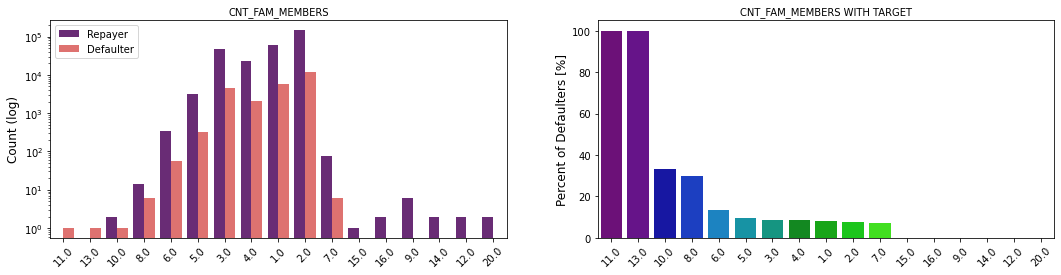

In [391]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["CNT_FAM_MEMBERS", 'TARGET']].groupby(["CNT_FAM_MEMBERS"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,4))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="CNT_FAM_MEMBERS", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["CNT_FAM_MEMBERS"],
                    palette='magma')

ax1.set_title('CNT_FAM_MEMBERS', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "CNT_FAM_MEMBERS", 
                    y='TARGET', 
                    order=cat_perc["CNT_FAM_MEMBERS"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('CNT_FAM_MEMBERS WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>The same trend follows as in case of number of children
    <li>More family members, more is the risk of defaulting

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 7. Income Type of the applicant has any role in impacting the loan repaying characteristics?  

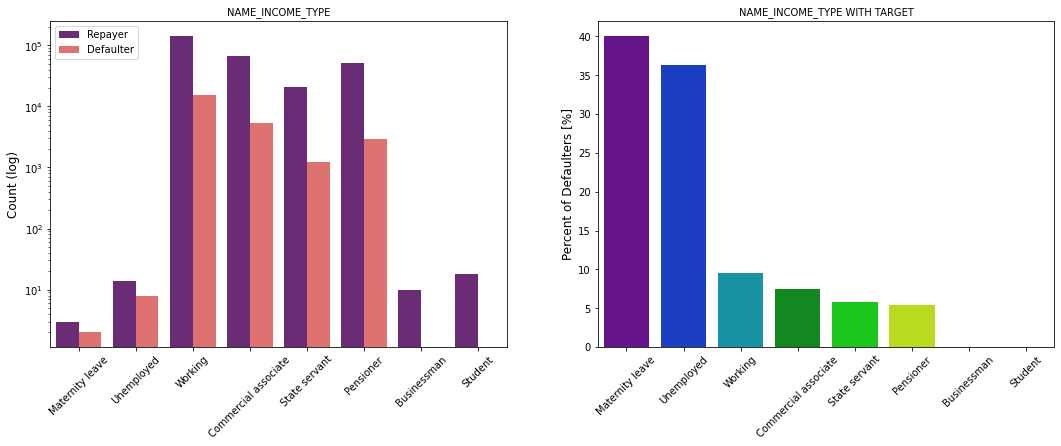

In [374]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["NAME_INCOME_TYPE", 'TARGET']].groupby(["NAME_INCOME_TYPE"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="NAME_INCOME_TYPE", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["NAME_INCOME_TYPE"],
                    palette='magma')

ax1.set_title('NAME_INCOME_TYPE', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "NAME_INCOME_TYPE", 
                    y='TARGET', 
                    order=cat_perc["NAME_INCOME_TYPE"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('NAME_INCOME_TYPE WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li> Working employees take more number of loans followed by Commercial associates, Pensioners and State servants    
    <li>The applicants at Mat Leave are highest defaulters followed by Unemployed category
    <li>Students and Businessmen have less defaults

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 8. How Organization Type of the applicant plays a role?  

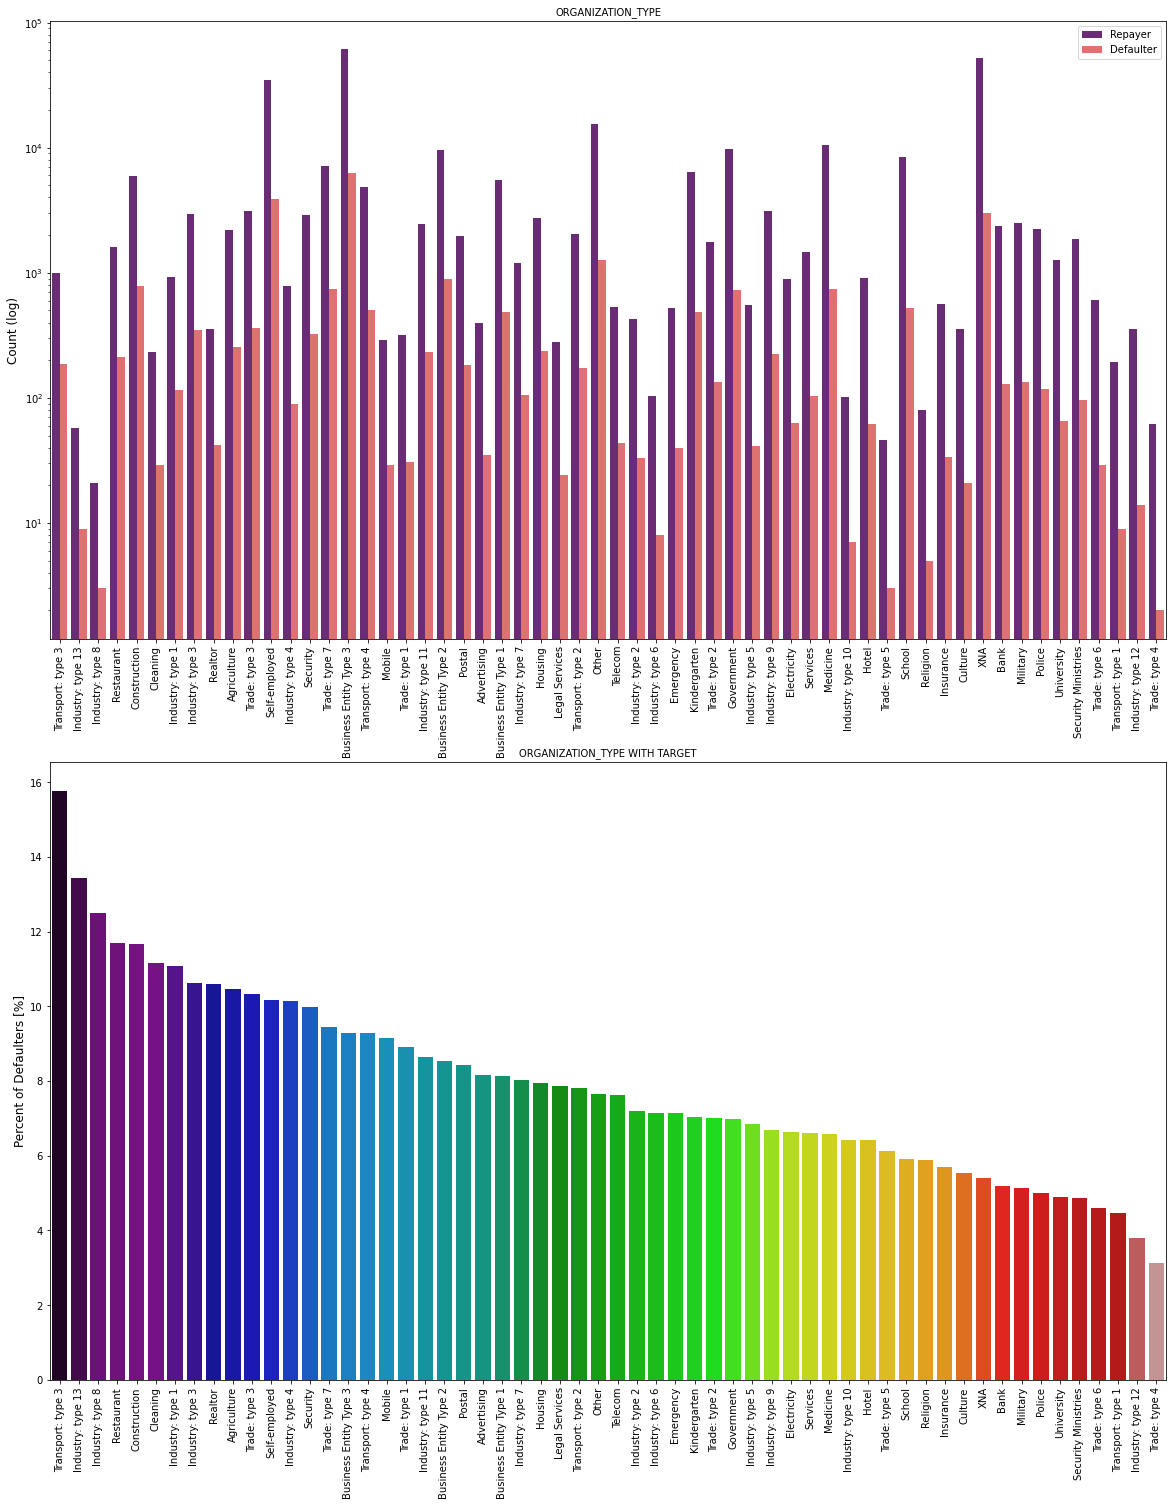

In [378]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["ORGANIZATION_TYPE", 'TARGET']].groupby(["ORGANIZATION_TYPE"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,25))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="ORGANIZATION_TYPE", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["ORGANIZATION_TYPE"],
                    palette='magma')

ax1.set_title('ORGANIZATION_TYPE', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "ORGANIZATION_TYPE", 
                    y='TARGET', 
                    order=cat_perc["ORGANIZATION_TYPE"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('ORGANIZATION_TYPE WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). 
    <li>Self employed people have relative high defaulting rate
    <li>Most of the people application for loan are from Business Entity Type 3
    <li>For a very high number of applications, Organization type information is unavailable(XNA)
    <li> Trade Type 4 and 5 & Industry type 8 have lesser defaulters

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 9. How Occupation Type of the applicant plays a role?  

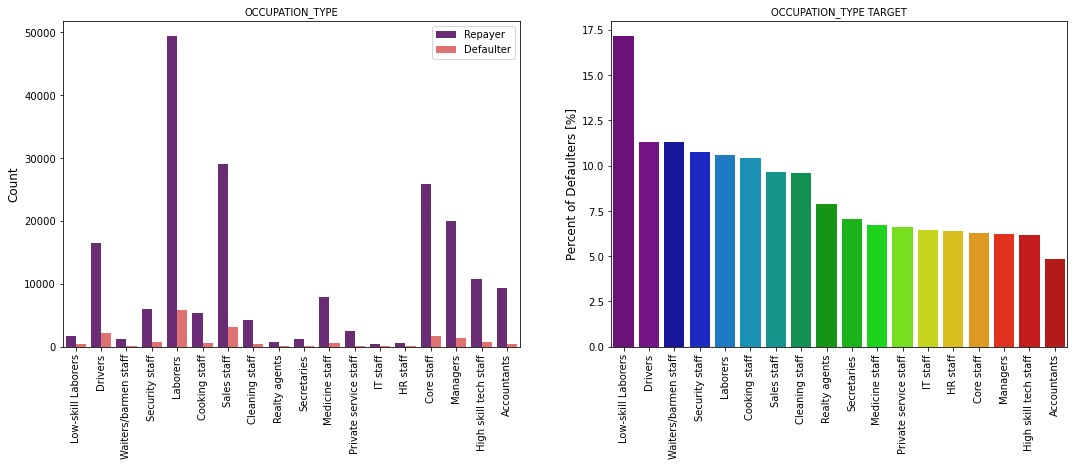

In [385]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["OCCUPATION_TYPE", 'TARGET']].groupby(["OCCUPATION_TYPE"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="OCCUPATION_TYPE", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["OCCUPATION_TYPE"],
                    palette='magma')

ax1.set_title('OCCUPATION_TYPE', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "OCCUPATION_TYPE", 
                    y='TARGET', 
                    order=cat_perc["OCCUPATION_TYPE"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('OCCUPATION_TYPE TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>Laborers take the highest number of loans, followed by Sales Staff and Core Staff
    <li>Low-skill laborers are having highest default percentages
    <li>Drivers, Waiters, Security Staff, Laborers & Cooking staff comprising most of the defaulters    

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 10. How Education Type of the applicant plays a role?  

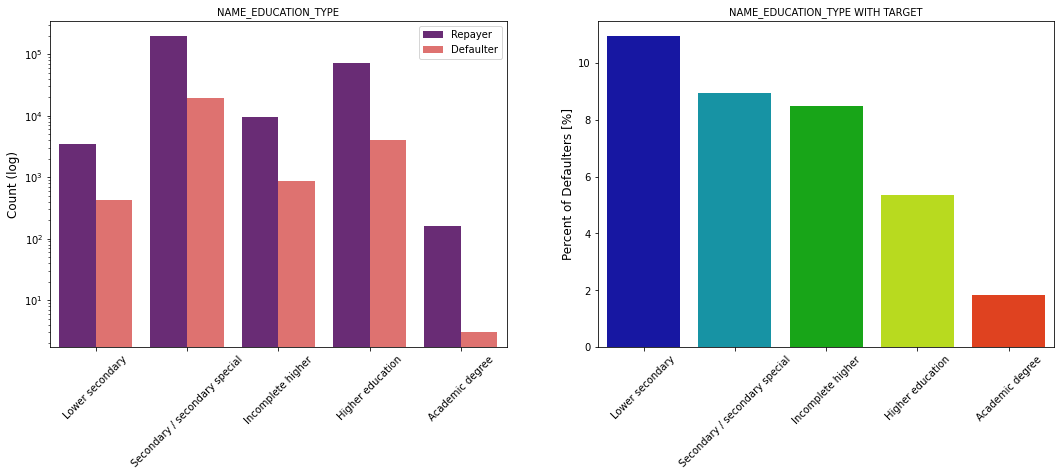

In [498]:
# Calculate the percentage of Target=1 per category value

cat_perc = applicationDF[["NAME_EDUCATION_TYPE", 'TARGET']].groupby(["NAME_EDUCATION_TYPE"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="NAME_EDUCATION_TYPE", 
                    data=applicationDF,
                    hue ="TARGET",
                    order=cat_perc["NAME_EDUCATION_TYPE"],
                    palette='magma')

ax1.set_title('NAME_EDUCATION_TYPE', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xlabel('')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "NAME_EDUCATION_TYPE", 
                    y='TARGET', 
                    order=cat_perc["NAME_EDUCATION_TYPE"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('NAME_EDUCATION_TYPE WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
plt.show()
    

<div class="alert alert-block alert-success">
    <ul>
    <li>People with Lower Secondary Education tend to default more.
    <li>Applicants with an Academic degree have lesser chances of defaulting.

<a id="numunivar"></a>
### <font color = "sky blue" > 5.3 Numerical Univariate Analysis

In [433]:
# Splitting the Application Data Frame based on TARGET=1 and TARGET=0

Analysis_col_list=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                   'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                   'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                   'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                   'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 
                   'REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 
                   'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
                   'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                   'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3']

RepayerDF = applicationDF.loc[applicationDF['TARGET']==0, Analysis_col_list] # Repayers
DefaulterDF = applicationDF.loc[applicationDF['TARGET']==1, Analysis_col_list] # Defaulters


<div class="alert alert-block alert-info"><font color=purple> 
  <b> 1. Let us look at distribution of all Amount Columns

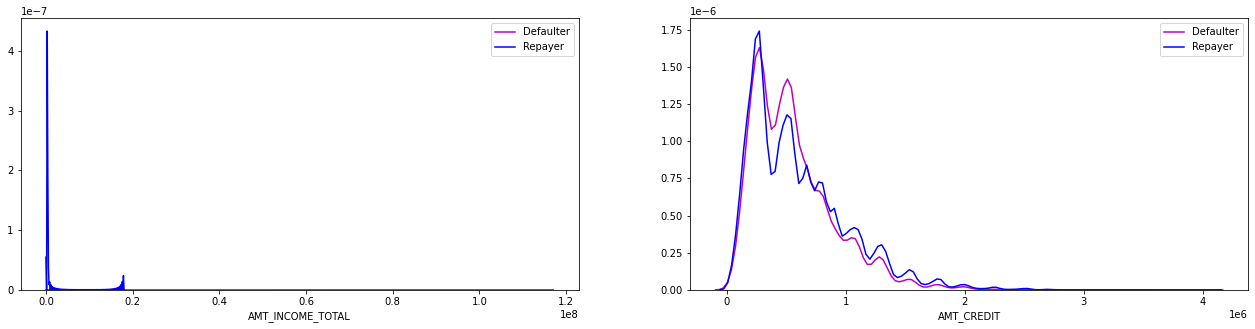

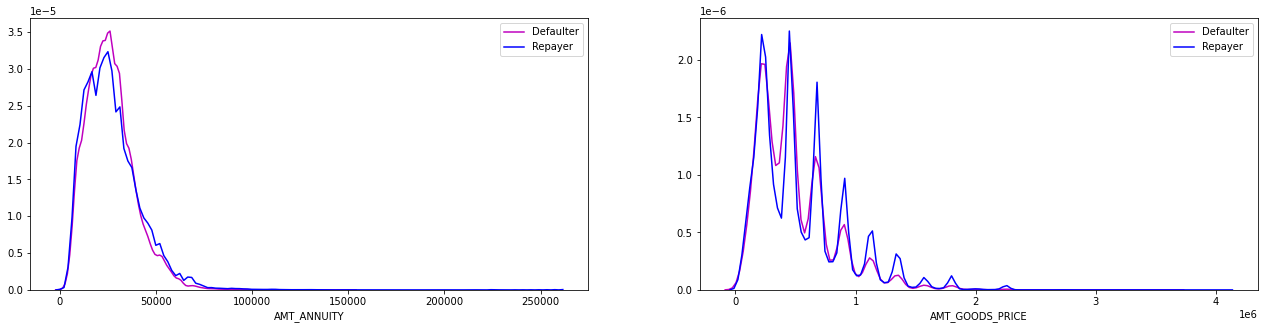

In [434]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(22,5))
sns.distplot(DefaulterDF['AMT_INCOME_TOTAL'], hist=False, color='m',label ="Defaulter", ax=ax1)
sns.distplot(RepayerDF['AMT_INCOME_TOTAL'], hist=False, color='b', label ="Repayer", ax=ax1)

sns.distplot(DefaulterDF['AMT_CREDIT'], hist=False, color='m',label ="Defaulter", ax=ax2)
sns.distplot(RepayerDF['AMT_CREDIT'], hist=False, color='b', label ="Repayer", ax=ax2)

fig, (ax3, ax4) = plt.subplots(ncols=2,figsize=(22,5))
sns.distplot(DefaulterDF['AMT_ANNUITY'], hist=False, color='m',label ="Defaulter", ax=ax3)
sns.distplot(RepayerDF['AMT_ANNUITY'], hist=False, color='b', label ="Repayer", ax=ax3)<div class="alert alert-block alert-success">
    <ul>
    <li>Laborers take the highest number of loans, followed by Sales Staff and Core Staff
    <li>Low-skill laborers are having highest default percentages
    <li>Drivers, Waiters, Security Staff, Laborers & Cooking staff comprising most of the defaulters    

sns.distplot(DefaulterDF['AMT_GOODS_PRICE'], hist=False, color='m',label ="Defaulter", ax=ax4)
sns.distplot(RepayerDF['AMT_GOODS_PRICE'], hist=False, color='b', label ="Repayer", ax=ax4)

plt.show()

<div class="alert alert-block alert-success">
    <ul>
            <li> Most no of loans are given for goods price below 10 lakhs </li>
            <li> Most people pay annuity below 50000 for the credit loan</li>
            <li> Credit amount of the loan is mostly less then 10 lakhs</li>
            <li> All these AMT_ANNUITY, AMT_GOODS_PRICE & AMT_CREDIT attributes are highly correlated</li>   

<a id="numbivar"></a>
### <font color = "sky blue" > 5.4 Numerical Bivariate Analysis

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 1. Let us look at a pair plot analysis between the Target Variable and the amount columns

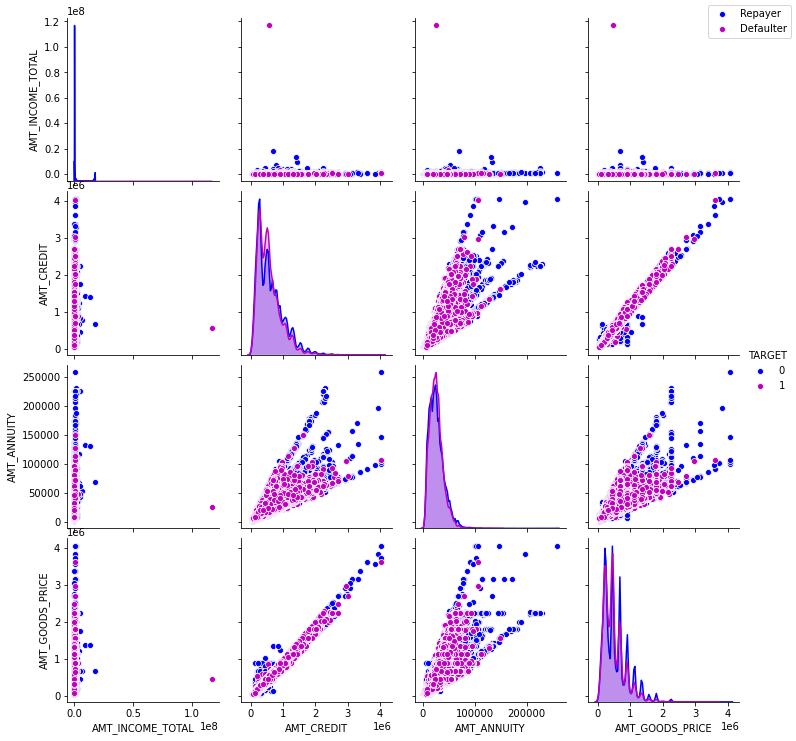

In [435]:
amountDF = applicationDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amountDF = amountDF[(amountDF["AMT_GOODS_PRICE"].notnull()) & (amountDF["AMT_ANNUITY"].notnull())]
ax=sns.pairplot(amountDF,hue="TARGET",palette=["b","m"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

<div class="alert alert-block alert-success">
        <ul>
            <li> When AMT_ANNUITY >150000 amt_goods_price> 3M, there is a lesser chance of defaulters  </li>
            <li> AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line</li>
            <li> AMT_INCOME doesn't show much interaction
        </ul>
    </span>    
</div>

<a id="nummultivar"></a>
### <font color = "sky blue" > 5.5 Numerical Multivariate Analysis (Correlation Matrix)

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 1. Let us look correlation/heatmap analysis between all the columns for Repayers

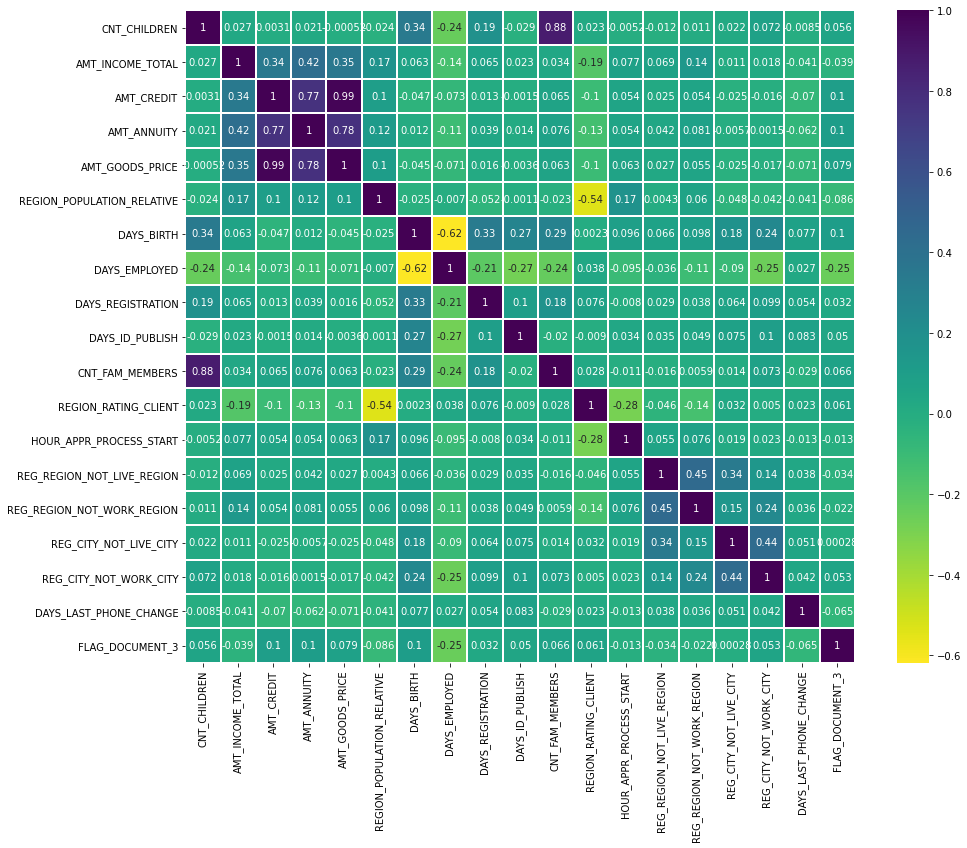

In [445]:
corr_repayer = RepayerDF.corr()

plt.figure(figsize=(15,12))
sns.heatmap(RepayerDF.corr(), cmap="viridis_r",annot=True,linewidth =1)
plt.show()

<div class="alert alert-block alert-success">
            Correlating factors amongst repayers:<br>
            Credit amount is highly correlated with
            <ul>                
                <li> Amount of Goods price</li>
                <li> Amount Annuity</li>
                <li> Total Income</li>
            </ul>
            We can also see that repayers have high correlation in number of days employed.
</div>

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 2. Let us look correlation/heatmap analysis between all the columns for Defaulters

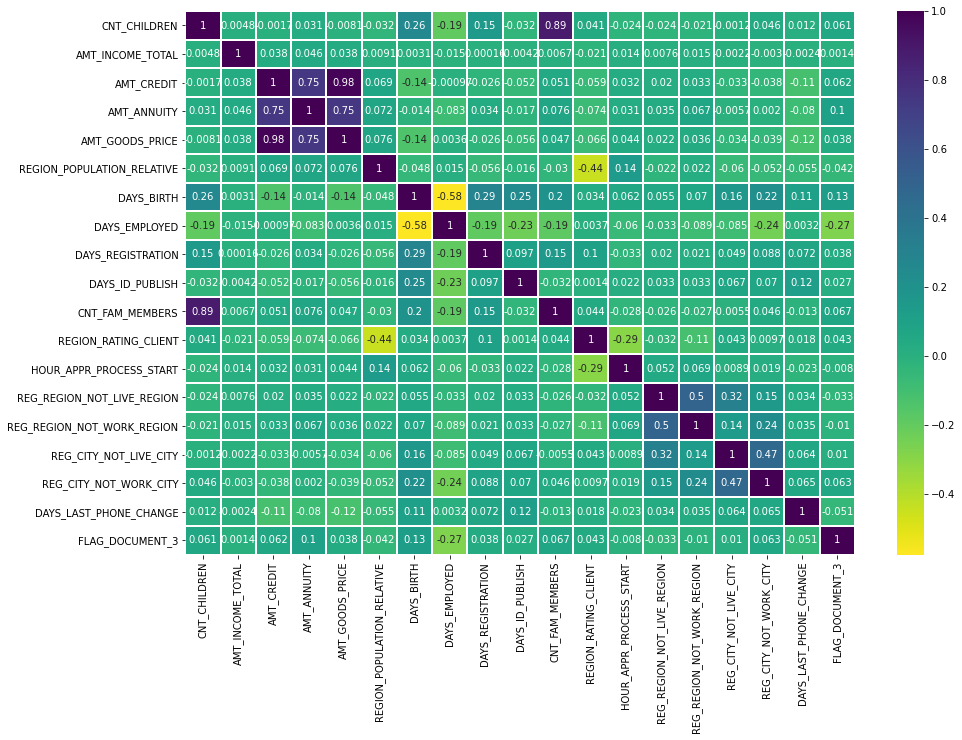

In [446]:
corr_Defaulter = DefaulterDF.corr()

plt.figure(figsize=(15,10))
sns.heatmap(DefaulterDF.corr(), cmap="viridis_r",annot=True,linewidth =1)
plt.show()

<div class="alert alert-block alert-success">
        <ul>
            <li> Credit amount is highly correlated with amount of goods price which is same as repayers. </li>
            <li> But the Amount annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)</li>
            <li> We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).</li>
            <li> There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.</li>
            <li> Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.</li>
        </ul>  
</div>

<a id="merge"></a>
## 6. Consolidated Data Set Analysis

<div class="alert alert-block alert-info"><font color=purple> 
  <b> Let us merge the Application Data Frame and Previous Data Frame to get more variables based on Previous Application columns and Target

<a id="prep"></a>
### <font color = "sky blue" > 6.1 Merge Data Sets

In [460]:
#Joining both the dataframes on SK_ID_CURR with Inner Joins
MergedDF = pd.merge(applicationDF, previousDF, how='inner', on='SK_ID_CURR')
MergedDF.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9,Y,1,XAP,Approved,-606,XNA,XAP,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12,Y,1,XNA,Approved,-746,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,low_normal,Cash X-Sell: low
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17,Y,1,XAP,Approved,-828,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400,Furniture,6.0,middle,POS industry with interest
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15,Y,1,XAP,Approved,-2341,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200,Consumer electronics,12.0,middle,POS household with interest
4,100004,0,Rev

In [461]:
MergedDF.shape

(1413701, 98)

In [463]:
MergedDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413701 entries, 0 to 1413700
Data columns (total 98 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   SK_ID_CURR                    1413701 non-null  int64  
 1   TARGET                        1413701 non-null  int64  
 2   NAME_CONTRACT_TYPE_x          1413701 non-null  object 
 3   CODE_GENDER                   1413701 non-null  object 
 4   FLAG_OWN_CAR                  1413701 non-null  object 
 5   FLAG_OWN_REALTY               1413701 non-null  object 
 6   CNT_CHILDREN                  1413701 non-null  int64  
 7   AMT_INCOME_TOTAL              1413701 non-null  float64
 8   AMT_CREDIT_x                  1413701 non-null  float64
 9   AMT_ANNUITY_x                 1413608 non-null  float64
 10  AMT_GOODS_PRICE_x             1412493 non-null  float64
 11  NAME_TYPE_SUITE               1410175 non-null  object 
 12  NAME_INCOME_TYPE            

In [466]:
MergedDF.describe().round(2)

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1413701.00,1413701.00,1413701.00,1.413701e+06,1413701.00,1413608.00,1412493.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.0,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1411880.00,1171859.00,1410555.00,1410555.00,1410555.00,1410555.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.0,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1413701.00,1250074.00,1250074.00,1250074.00,1250074.00,1250074.00,1250074.00,1413701.00,1106483.00,1413701.00,1413700.00,1094176.00,1413701.00,1413701.00,1413701.00,1413701.00,1106488.00
mean,278481.29,0.09,0.40,1.733160e+05,587553.67,27017.02,527718.59,0.02,-16321.05,68702.03,-5003.23,-3034.56,1.0,0.81,0.18,1.00,0.28,0.07,2.15,2.06,2.04,11.98,0.01,0.04,0.04,0.07,0.22,0.17,0.51,0.49,1.54,0.15,1.53,0.11,-1084.70,0.00,0.74,0.00,0.01,0.09,0.00,0.07,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.04,0.30,0.36,2.91,1922744.33,15837.18,175243.59,196354.09,226451.19,12.48,1.00,-880.37,314.99,16.05
std,102811.79,0.28,0.72,1.985734e+05,384917.33,13951.16,353246.49,0.01,4344.56,145277.70,3551.05,1507.38,0.0,0.40,0.39,0.03,0.45,0.26,0.90,0.50,0.49,3.23,0.11,0.21,0.19,0.26,0.42,0.38,0.19,0.20,2.53,0.47,2.51,0.38,799.94,0.01,0.44,0.01,0.12,0.29,0.01,0.26,0.06,0.01,0.04,0.0,0.04,0.04,0.03,0.08,0.01,0.06,0.02,0.02,0.01,0.08,0.11,0.21,0.98,0.93,2.20,532715.34,14724.91,293622.19,319481.25,315937.60,3.33,0.06,783.54,7695.08,14.57
min,100002.00,0.00,0.00,2.565000e+04,45000.00,1615.50,40500.00,0.00,-25201.00,-17912.00,-24672.00,-7197.00,1.0,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4292.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1000001.00,0.00,0.00,0.00,0.00,0.00,0.00,-2922.00,-1.00,0.00
25%,189364.00,0.00,0.00,1.125000e+05,270000.00,16821.00,238500.00,0.01,-19980.00,-2828.00,-7510.00,-4319.00,1.0,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.34,0.00,0.00,0.00,0.00,-1683.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1461346.00,6257.86,19750.50,24880.50,49828.50,10.00,1.00,-1313.00,-1.00,6.00
50%,278992.00,0.00,0.00,1.575000e+05,508495.50,24925.50,450000.00,0.02,-16044.00,-1281.00,-4508.00,-3330.00,1.0,1.00,0.00,1.00,0.00,0.00,2.00,2.00,2.00,12.00,0.00,0.00,0.00,0.00,0.00,0.00,

<a id="mcatvar"></a>
### <font color = "sky blue" > 6.2 Categorial Univariate Analysis

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 1. Let us see how the people with diff Contract Status behave.

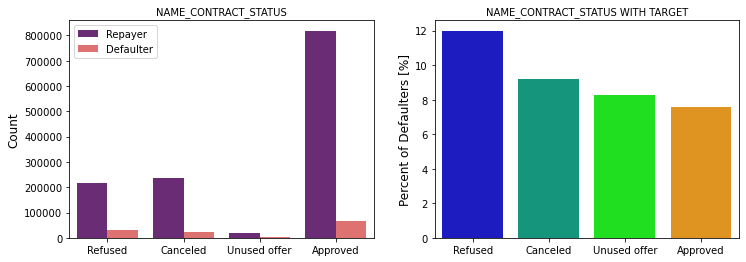

In [471]:
# Calculate the percentage of Target=1 per category value

cat_perc = MergedDF[["NAME_CONTRACT_STATUS", 'TARGET']].groupby(["NAME_CONTRACT_STATUS"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="NAME_CONTRACT_STATUS", 
                    data=MergedDF,
                    hue ="TARGET",
                    order=cat_perc["NAME_CONTRACT_STATUS"],
                    palette='magma')

ax1.set_title('NAME_CONTRACT_STATUS', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('')

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "NAME_CONTRACT_STATUS", 
                    y='TARGET', 
                    order=cat_perc["NAME_CONTRACT_STATUS"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('NAME_CONTRACT_STATUS WITH TARGET', fontdict={'fontsize' : 10, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xlabel('')
plt.show()
    

In [477]:
print(MergedDF.groupby("NAME_CONTRACT_STATUS")["TARGET"].value_counts(normalize=True)*100)

NAME_CONTRACT_STATUS  TARGET
Approved              0         92.411345
                      1          7.588655
Canceled              0         90.826431
                      1          9.173569
Refused               0         88.003586
                      1         11.996414
Unused offer          0         91.748276
                      1          8.251724
Name: TARGET, dtype: float64


<div class="alert alert-block alert-success">
        <br><b>Based on contract status data above, we can say</b>
        <ul>
            <li> 90% of the previously cancelled client have actually repayed the loan. 
            <li> 88% of the clients who have been previously refused a loan has payed back the loan in current case.</li>
           </li>
        </ul>

</div>

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 2. Now, let us see the purpose of taking the loan and what is the loan purpose that has resulted is most default?

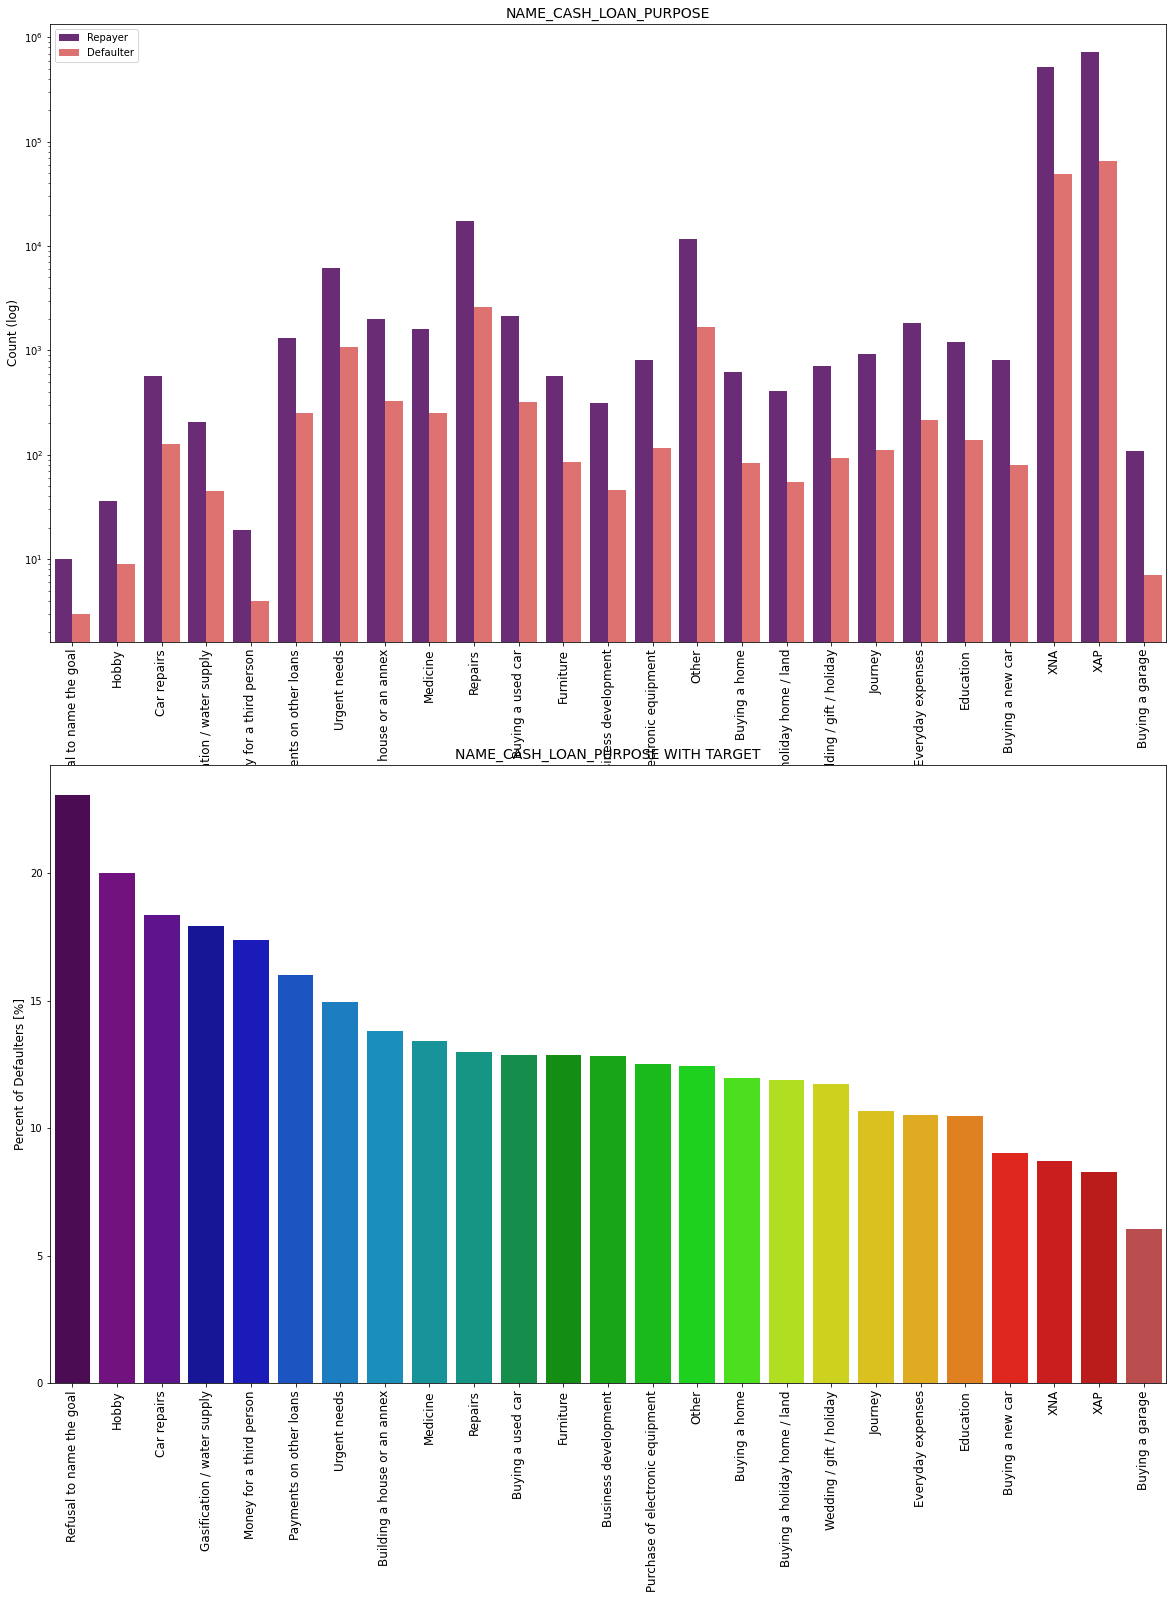

In [553]:
# Calculate the percentage of Target=1 per category value

cat_perc = MergedDF[["NAME_CASH_LOAN_PURPOSE", 'TARGET']].groupby(["NAME_CASH_LOAN_PURPOSE"],as_index=False).mean()
cat_perc["TARGET"] = cat_perc["TARGET"]*100 
cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,25))

# 1. Plotting the Counts of the Categorical Values (WITHOUT TARGET)
sns.countplot(ax=ax1,x ="NAME_CASH_LOAN_PURPOSE", 
                    data=MergedDF,
                    hue ="TARGET",
                    order=cat_perc["NAME_CASH_LOAN_PURPOSE"],
                    palette='magma')

ax1.set_title('NAME_CASH_LOAN_PURPOSE', fontdict={'fontsize' : 14, 'fontweight' : 3}) 
ax1.legend(['Repayer','Defaulter'])
ax1.set_yscale('log')
ax1.set_ylabel('Count (log)', fontsize=12)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=12)
ax1.set_xlabel('')

# 2. Plotting Percentage of defaulters in the categorical column (WITH TARGET)
sns.barplot(ax=ax2, x = "NAME_CASH_LOAN_PURPOSE", 
                    y='TARGET', 
                    order=cat_perc["NAME_CASH_LOAN_PURPOSE"], 
                    data=cat_perc,
                    palette='nipy_spectral')
ax2.set_title('NAME_CASH_LOAN_PURPOSE WITH TARGET', fontdict={'fontsize' : 14, 'fontweight' : 3}) 
ax2.set_ylabel('Percent of Defaulters [%]', fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90, fontsize=12)
ax2.set_xlabel('')
plt.show()

<div class="alert alert-block alert-success">
        <ul>
            <li> Loan purpose has high number of unknown values (XAP, XNA)</li>
            <li> Loan taken for the purpose of Repairs seems to have highest default rate</li>
            <li> The highest percentage of defaulters chose not to disclose the purpose of the loan
            <li> Next to that, The purposes like Hobby, Car repairs, Gasification/Water Supply & Money for a third person are having high default rates
            </li>
        </ul>
</div>

<a id="mnumbivar"></a>
### <font color = "sky blue" > 6.3 Numerical Bivariate Analysis

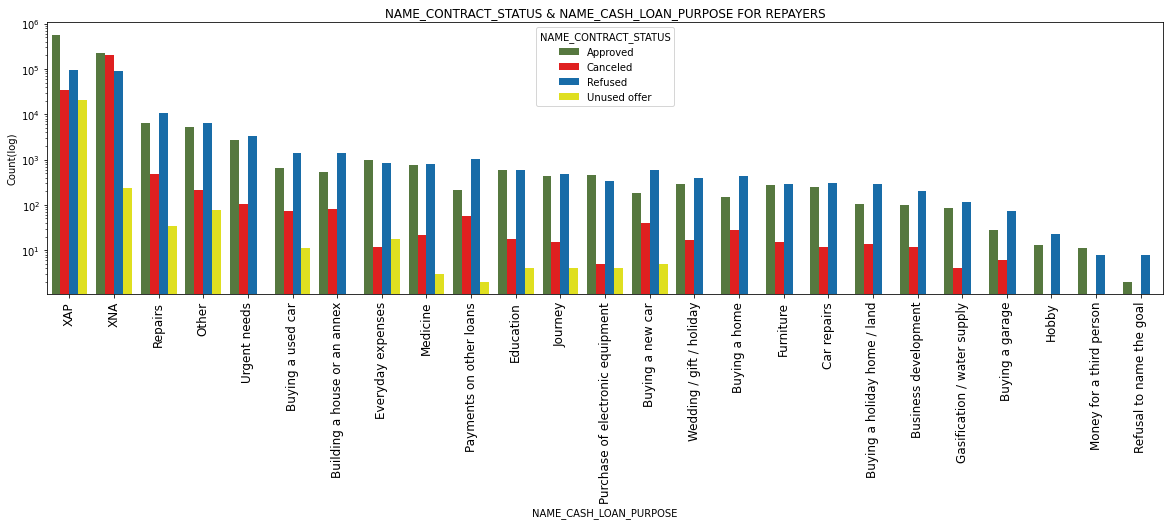

In [547]:
plt.figure(figsize=[20,5])
ax1=sns.countplot(x='NAME_CASH_LOAN_PURPOSE', 
              data=M0,
              hue='NAME_CONTRACT_STATUS',
              palette= ["#548235","#FF0000","#0070C0","#FFFF00"],
              order=M0['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS & NAME_CASH_LOAN_PURPOSE FOR REPAYERS")
plt.ylabel('Count(log)')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=12)
plt.show()

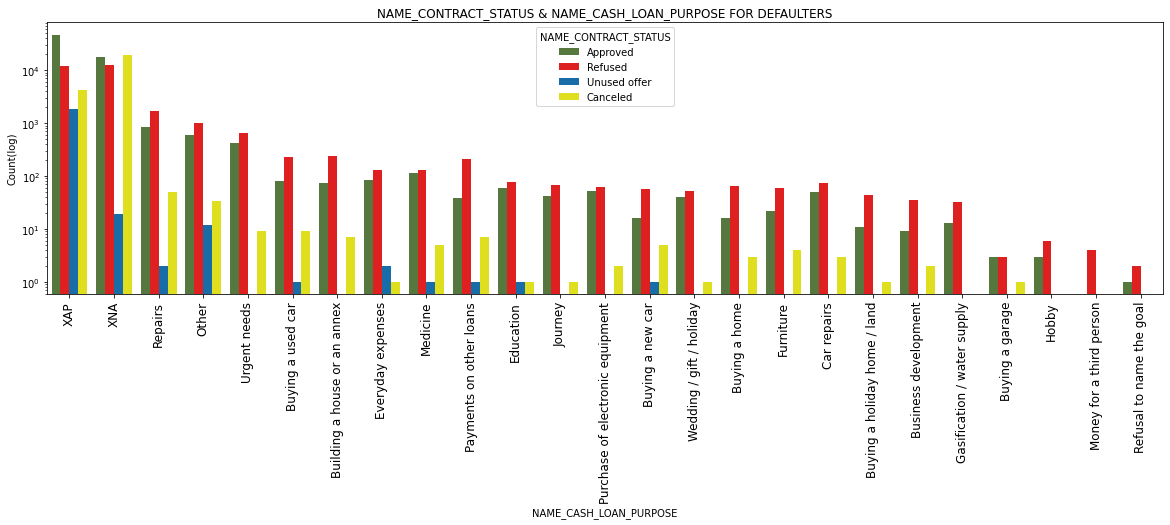

In [548]:
plt.figure(figsize=[20,5])
ax1=sns.countplot(x='NAME_CASH_LOAN_PURPOSE', 
              data=M1,
              hue='NAME_CONTRACT_STATUS',
              palette= ["#548235","#FF0000","#0070C0","#FFFF00"],
              order=M0['NAME_CASH_LOAN_PURPOSE'].value_counts().index)
plt.yscale('log')
plt.title("NAME_CONTRACT_STATUS & NAME_CASH_LOAN_PURPOSE FOR DEFAULTERS")
plt.ylabel('Count(log)')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90, fontsize=12)
plt.show()

<div class="alert alert-block alert-success">
        <ul>
            <li> A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.</li>
        </ul>
</div>

<a id="mnummultivar"></a>
### <font color = "sky blue" > 6.4 Numerical Multivariate Analysis

In [517]:
merged_list_corr=['NAME_CONTRACT_TYPE_y','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y', 
                  'WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_y','FLAG_LAST_APPL_PER_CONTRACT',
                  'NFLAG_LAST_APPL_IN_DAY','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','DAYS_DECISION',
                  'NAME_PAYMENT_TYPE','CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',  'NAME_GOODS_CATEGORY', 
                  'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 
                  'CNT_PAYMENT',  'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION']

In [516]:
M0 = MergedDF.loc[MergedDF['TARGET']==0, merged_list_corr] # Repayers
M1 = MergedDF.loc[MergedDF['TARGET']==1, merged_list_corr] # Defaulters

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 1. Let us look correlation/heatmap analysis between all the columns for Repayers

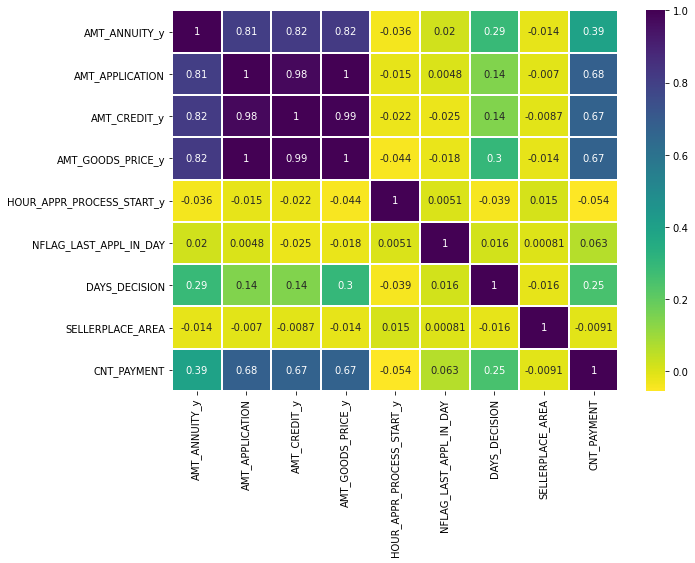

In [514]:
plt.figure(figsize=(10,7))
sns.heatmap(M0.corr(), cmap="viridis_r",annot=True,linewidth =1)
plt.show()

<div class="alert alert-block alert-info"><font color=purple> 
  <b> 2. Let us look correlation/heatmap analysis between all the columns for Defaulters

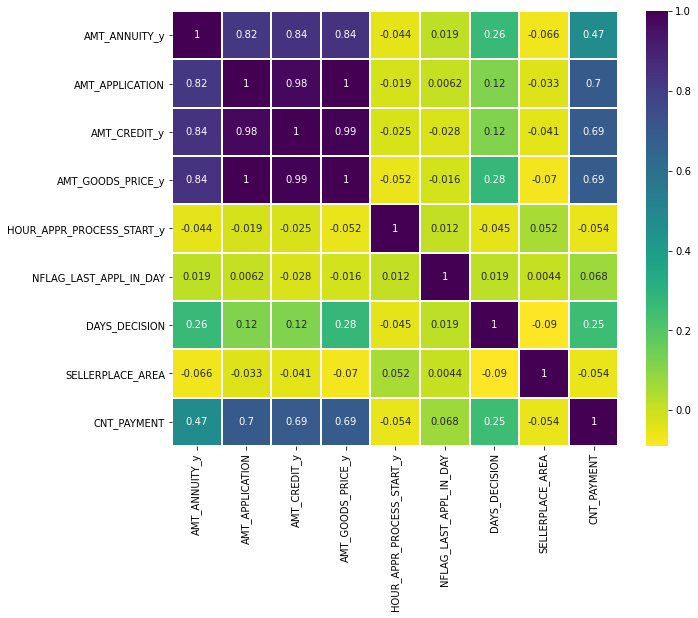

In [518]:
plt.figure(figsize=(10,8))
sns.heatmap(M1.corr(), cmap="viridis_r",annot=True,linewidth =1)
plt.show()

<div class="alert alert-block alert-success">
        <ul>
            <li> AMT_ANNUITY, AMT_CREDIT, AMT_APPLICATION & AMT_GOODS_PRICE are highly correlated in both Repayers & Defaulters </li>
            <li> DAYS_DECISION also have correlation with AMT_ANNUITY & AMT_GOOD_PRICE in both Defaulters & Repayers.
            <li> CNT_PAYMENT has a good correlation with AMT_APPLICATION, AMT_GOODS_PRICE, AMT_CREDIT & AMT_ANNUITY both in Repayers & Defaulters.</li>
            <li> SELLERPRICE_AREA and DAYS_DECISION have a negative correlation with each other for both Repayers & Defaulters.</li>
        </ul>  
</div>

<a id="conclusion"></a>
## 7. Inferences & Conclusion

<div class="alert alert-block alert-success">
    <b>Top Correlations from Analysis:<br>
        Based on Application Columns for Repayers</b>
    <ol>
    <li>AMT_CREDIT is highly correlated with AMT_GOODS_PRICE (0.99)
    <li>AMT_CREDIT is highly correlated with AMT_ANNUITY (0.77)
    <li>AMT_ANNUITY & AMT_GOOD_PRICE are highly correlated (0.78)
    <li>AMOUNT_INCOME_TOTAL is moderately correlated with AMT_CREDIT (0.34), AMT_ANNUITY (0.42) & AMT_GOODS_PRICE (0.35)
    <li>CNT_CHILDREN is highly correlated with CNT_FAM_MEMBERS (0.88)
    <li>DAYS_BIRTH has correlation with CNT_CHILDREN (0.34), DAYS_ REGISTRATION ( 0.33), DAYS_ID_ PUBLISH ( 0.27) & CNT_FAM_ MEMBERS 0.29)
    </ol>
    <br>
        <b>Based on Application Columns for Defaulters</b>
    <ol>
    <li>AMT_CREDIT is highly correlated with AMT_GOODS_PRICE (0.98)
    <li>AMT_CREDIT is highly correlated with AMT_ANNUITY (0.75)
    <li>AMT_ANNUITY & AMT_GOOD_PRICE are highly correlated (0.98) More compared to Repayers
    <li>CNT_CHILDREN is highly correlated with CNT_FAM_MEMBERS (0.89)
    <li>DAYS_BIRTH has correlation with CNT_ CHILDREN ( 0.26), DAYS_ REGISTRATION ( 0.29), DAYS_ID_ PUBLISH ( 0.25) & CNT_FAM_ MEMBERS 0.2) - A little reduced that Repayers
    <li>There is a severe drop in the correlation between AMT_INCOME_TOTAL and the AMT_CREDIT( 0.038) amongst defaulters whereas it is 0.342 among Repayers
    </ol>
        <br>
    <b>Based on Previous Application Columns for Repayers & Defaulters</b>
    <ol>
    <li>DAYS_DECISION also have correlation with AMT_ANNUITY & AMT_GOOD_PRICE in both Defaulters & Repayers
    <li>CNT_PAYMENT has a good correlation with AMT_APPLICATION, AMT_GOODS_PRICE, AMT_CREDIT & AMT_ANNUITY both in Repayers &    Defaulters.
    <li>SELLERPRICE_AREA and DAYS_DECISION have a negative correlation with each other for both Repayers & Defaulter
    </ol>    

<div class="alert alert-block alert-success">
        <b>When will an applicant be a Repayer? </b> 
        <ol>
            <li>NAME_CONTRACT_TYPE: Cash Loan have less defaults. </li>
            <li>CODE_GENDER: Females have less defaults. </li>
            <li>NAME_HOUSING_TYPE: Office Apartment Residents have less defaults. </li>
            <li>NAME_FAMILY_STATUS: Widows categories have less defaults. </li>
            <li>CNT_CHILDREN & CNT_FAM_MEMBERS: People having no children and with less family members has lowest percentage defaults. </li>
            <li>NAME_EDUCATION_TYPE: Academic degree has less defaults. </li>
            <li>NAME_INCOME_TYPE: Student and Businessmen have no defaults.</li>
            <li>ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%</li>
            <li>OCCUPATION_TYPE: Accountants have lowest default rates</li>
            <li>AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loans bought for Buying garage & buying a new car are being repayed mostly.</li>
        </ol>
</div>

<div class="alert alert-block alert-danger">
        <b>When will an applicant be a Defaulter? </b> 
        <ol>
            <li>NAME_CONTRACT_TYPE: Revolving Loans have more defaults. </li>
            <li>CODE_GENDER: Men are at relatively higher default rate</li>
            <li>NAME_HOUSING_TYPE: People staying with Parents and in Rented Aparments are high defaults. </li>
            <li>NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot. </li>
            <li>CNT_CHILDREN & CNT_FAM_MEMBERS: People with higher number of children and more family members default a lot. </li>
            <li>NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education</li>
            <li>NAME_INCOME_TYPE: Applicants who are either at Maternity leave OR Unemployed default a lot.</li>
            <li>ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate</li>
            <li>OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as the default rate is huge.</li>
            <li>AMT_GOODS_PRICE: When the credit amount goes beyond 3M, there is an increase in defaulters.</li>
            <li>NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby & Car Repairs are being defaulted mostly.</li>
        </ol>
</div>

<div class="alert alert-block alert-info">
    <b> A few more inferences based on NAME_CONTRACT_STATUS:    </b><br><br>
90% of the previously cancelled client have actually repayed the loan. <br>
88% of the clients who have been previously refused a loan have repaid the loan as per the data<br>
    A very high number application have been rejected by bank or refused by client which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan.